In [1]:
#P100 Ram: 16G
# !nvidia-smi

# ResNet Training

In [4]:
class Timer:
    def __init__(self, message):
        self.message = message
        self.st_time = time.time()
        
    def end(self):
        end_time = time.time()
        elapsed_time = end_time-self.st_time
        print(f'{self.message} process took {elapsed_time//60}min, {elapsed_time%60:.2f}sec')        
        

In [5]:
def img_resize(files,path):
    img_to_numpy = []
#     for file in tqdm(files):
    for file in files:
        file_img = PIL.Image.open(f"{path}/{file}")
        file_img = file_img.resize((224, 224))
        img_to_numpy.append(np.array(file_img))
    return np.array(img_to_numpy)

def data_split(img_data):
    x_train, x_val = train_test_split(img_data, test_size = 0.2, random_state=42)
    x_train, x_test = train_test_split(x_train, test_size = 0.2, random_state=42)
    print(f'train: {x_train.shape}, val: {x_val.shape}, test: {x_test.shape}')
    return x_train, x_val, x_test

In [6]:
#  Load Dataset and Unzip
timer_unzip = Timer("Data Unzip")
base_path = '/kaggle/input/dogs-vs-cats'
filelist = os.listdir('/kaggle/input/dogs-vs-cats')
for _file in filelist:
    if '.zip' in _file:
        with zipfile.ZipFile(os.path.join(base_path, _file), 'r') as z:
            z.extractall('/kaggle/working')
timer_unzip.end()

Data Unzip process took 0.0min, 13.62sec


In [7]:
# Split Cat and Dog
timer_datasplit = Timer("Data Split")
train_files = os.listdir("/kaggle/working/train")
cat_files = sorted([file for file in train_files if file.split(".")[0] == "cat"], key=lambda x: int(x.split(".")[1]))
dog_files = sorted([file for file in train_files if file.split(".")[0] == "dog"], key=lambda x: int(x.split(".")[1]))
timer_datasplit.end()

Data Split process took 0.0min, 0.05sec


In [8]:
# From Total 25000, Random Sampling 1000 imgs
# needs Seed Setting
timer_randomsampling = Timer("Data Random Sampling")
np.random.seed(42)
cat_random_sample = np.random.choice(cat_files, 6250) # array
dog_random_sample = np.random.choice(dog_files, 6250) # array
print(f"cat img count {cat_random_sample.shape}, dog img count {dog_random_sample.shape}")
timer_randomsampling.end()

cat img count (6250,), dog img count (6250,)
Data Random Sampling process took 0.0min, 0.01sec


In [9]:
# Image Resize
timer_img_resize = Timer("Image Resize")
numpy_cat = img_resize(cat_random_sample, "/kaggle/working/train")
numpy_dog = img_resize(dog_random_sample, "/kaggle/working/train")
# numpy_cat = img_resize(cat_files, "/kaggle/working/train")
# numpy_dog = img_resize(dog_files, "/kaggle/working/train")
timer_img_resize.end()

Image Resize process took 0.0min, 44.19sec


In [10]:
# Train, Val, Test Split
timer_split = Timer("Train, Val, Test Split")
train_cat, val_cat, test_cat = data_split(numpy_cat)
train_dog, val_dog, test_dog = data_split(numpy_dog)

# Memory manage
del numpy_cat, numpy_dog
gc.collect()
timer_split.end()

train: (4000, 224, 224, 3), val: (1250, 224, 224, 3), test: (1000, 224, 224, 3)
train: (4000, 224, 224, 3), val: (1250, 224, 224, 3), test: (1000, 224, 224, 3)
Train, Val, Test Split process took 0.0min, 1.10sec


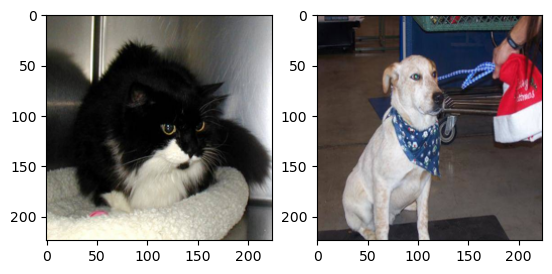

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(train_cat[3])
plt.subplot(1, 2, 2)
plt.imshow(train_dog[3])
plt.show()